### Ordinary Least Squared (OLS) Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

# the suffix .api indicates we will import a large part of the statsmodels module 
import statsmodels.api as sm

In [2]:
data = pd.read_excel("Running a Regression in Python_HOUSING.xlsx")

In [3]:
data

,HOUSE PRICE,HOUSE SIZE (Sq. ft.),STATE,ROOMS,YEAR OF CONSTRUCTION
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [4]:
# extracts just the important data referent both to the house's prices and sizes respectively
data[["HOUSE PRICE", "HOUSE SIZE (Sq. ft.)"]]

,HOUSE PRICE,HOUSE SIZE (Sq. ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


### Univariate Regression

In [5]:
X = data["HOUSE SIZE (Sq. ft.)"]
Y = data["HOUSE PRICE"]

In [6]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: HOUSE SIZE (Sq. ft.), dtype: int64

In [7]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: HOUSE PRICE, dtype: int64

All data points will be scattered in the plot.

**Scatter:** To cause to separate and go in different directions, to distribute loosely, strew.

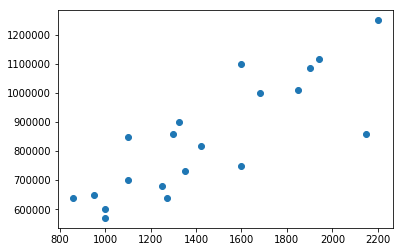

In [8]:
plt.scatter(X,Y)
plt.show()

**AXIS:** The axis method allows to set the start and the end values in the following way.

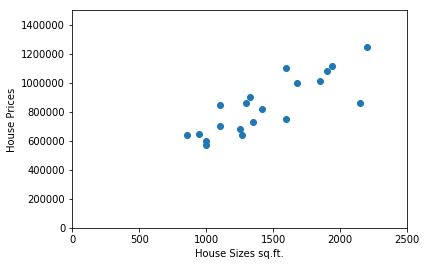

In [9]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
'''
we use this "end values" because we know there is not 
house bigger than 2500 square feet and either more
expensive than 1500000 USD
'''
plt.ylabel("House Prices")
plt.xlabel("House Sizes sq.ft.")
plt.show()

## Computing Alpha, Beta and R Squared

### Creating a constant

The **statsmodel** module contains tools to running a regression.

The procedure to follow needs to include a **constant**.

We pass as a parameter the newly obtained information that is the object **X** (house sizes) in assign it to a new constant variable (CONSTANT_X).

### Calculating the regression
As arguments to calculate the **Ordinary Least Squared Regression (OLS)** it is necessary to add the **dependent variable Y (House prices)** and the newly defined **CONSTANT_X** and call the fit( ) method.

### fit( )
The fit() method applies a specific estimation technique to obtain the full fit of the model.
The results include an estimate of covariance matrix, (whitened) residuals and an estimate of scale.

In [10]:
CONSTANT_X = sm.add_constant(X)

regression = sm.OLS(Y, CONSTANT_X).fit()

The **regression.summary()** will display the **OLS** regression results and will organize them in three tables.

In [11]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HOUSE PRICE   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           8.13e-06
Time:                        17:10:54   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
HOUSE SIZE (Sq. ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS Regression Results Explained

#### First Table

- **Dependent Variable** => HOUSE PRICE
- **Type of Regression (Model and Method)** => OLS
- **R² (R-Squared)** => 0.678 
Meaning that house size can explain 67,8% of the house pricing so we can affirm this model has a good explanatory power

#### Second Table
Contains results regarding the constant we add previously (CONSTANT_X), most of them in scientific notation.
- **coefficient of the constant** => 2.608e+05 (aprox. 260,800)
Represents **Alpha** (α) in your regression equation (**the intercept**).

Meaning that when we draw the regression line, the **starting point** of that line on the **Y axis** will be 260,800.

- **coefficient of the House Size** => 401.9163 (aprox. 402,00 USD)
Represents **Beta** (β) in your regression equation (**the slope of the regression line**).

Meaning that **every square foot increased** in the size of the house its price is **expected to rise by 402,00 USD**

- **standard error of the House Size** => 65.243 USD
Indicates that the augmentation (the process of increasing the size, value or quality of something) of 402 USD will typically vary in a range of 65 USD.


### Checking if the logic of the regression is correct

Prior the regression output that relies on the classic **OLS regression equation**, we can expected a house with the size of 1000 square feet to equal alpha, which is 260.800,00 USD plus beta which is equal to 402,00 USD times 1000.

In [12]:
# Y = βx + α + error
# α = 402 USD
# β = 260800 USD
# x = 1000 square feet

price_for_a_1000_sqft_house = 260800 + 402 * 1000

In [13]:
price_for_a_1000_sqft_house

662800

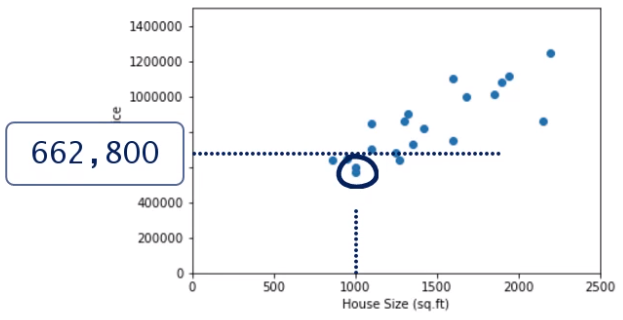

### Scipy

Alternativelly **scipy linregress** method allows us to **extract five of the statsmodels statics** very quickly.

### Alpha, Beta, R²

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [25]:
# beta
slope

401.91628631922595

In [26]:
#alpha
intercept

260806.2360560964

In [18]:
r_value

0.8235775534696924

In [28]:
# We need R² so always remember raise the value of R to the power of 2
r_value ** 2

0.678279986579124

In [29]:
p_value

8.129642377231308e-06

In [30]:
std_err

65.24299510636492